# Minimal working example

In [1]:
import pandas as pd
import numpy as np

from mprod.dimensionality_reduction import TCAM
from mprod import table2tensor

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')
%matplotlib inline


## Load files

In [3]:
file_path = "/home/labs/elinav/uria/mprod_package/docs/examples/data/Suez2018.txt"
data_raw = pd.read_csv(file_path, index_col=[0,1,2,3]
                       , dtype={'Participant':int,'Day':int})
meta_time = data_raw.index.to_frame().reset_index(drop = True)
meta = meta_time.drop(['Day','Phase'], axis=1).drop_duplicates()

display(data_raw.head())
display(meta_time.head())
display(meta.head())



s__Vagococcus_lutrae  s__Asaccharobacter_celatus  \
Participant Phase Group Day                                                     
602         BAS   FMT   3            9.999999e-07                    0.000051   
                        6            9.999999e-07                    0.000263   
            ABX   FMT   10           1.000001e-06                    0.000001   
                        13           1.000000e-06                    0.000012   
            INT   FMT   17           9.999999e-07                    0.000027   

                             s__Megasphaera_elsdenii  s__Leuconostoc_carnosum  \
Participant Phase Group Day                                                     
602         BAS   FMT   3                   0.018276             9.999999e-07   
                        6                   0.017956             9.999999e-07   
            ABX   FMT   10                  0.000001             1.000001e-06   
                        13                  0.000270             1.000000e-06   
            INT   FMT   17                  0.000628             9.999999e-07   

                             s__Streptococcus_agalactiae  \
Participant Phase Group Day                                
602         BAS   FMT   3                   9.999999e-07   
                        6                   9.999999e-07   
            ABX   FMT   10                  1.000001e-06   
                        13                  1.000000e-06   
            INT   FMT   17                  9.999999e-07   

                             s__Tyzzerella_nexilis  \
Participant Phase Group Day                          
602         BAS   FMT   3             9.999999e-07   
                        6             9.999999e-07   
            ABX   FMT   10            1.000001e-06   
                        13            1.000000e-06   
            INT   FMT   17            9.999999e-07   

                             s__Akkermansia_muciniphila  \
Participant Phase Group Day                               
602         BAS   FMT   3                      0.000198   
                        6                      0.000175   
            ABX   FMT   10                     0.000001   
                        13                     0.000209   
            INT   FMT   17                     0.000486   

                             s__Alistipes_timonensis  \
Participant Phase Group Day                            
602         BAS   FMT   3               9.999999e-07   
                        6               9.999999e-07   
            ABX   FMT   10              1.000001e-06   
                        13              1.000000e-06   
            INT   FMT   17              9.999999e-07   

                             s__Peptostreptococcus_anaerobius  \
Participant Phase Group Day                                     
602         BAS   FMT   3                        9.999999e-07   
                        6                        9.999999e-07   
            ABX   FMT   10                       1.000001e-06   
                        13                       1.000000e-06   
            INT   FMT   17                       9.999999e-07   

                             s__Streptococcus_anginosus_group  ...  \
Participant Phase Group Day                                    ...   
602         BAS   FMT   3                        9.999999e-07  ...   
                        6                        9.999999e-07  ...   
            ABX   FMT   10                       2.271773e-03  ...   
                        13                       1.298585e-03  ...   
            INT   FMT   17                       9.999999e-07  ...   

                             s__Clostridium_celatum  \
Participant Phase Group Day                           
602         BAS   FMT   3              9.999999e-07   
                        6              9.586594e-05   
            ABX   FMT   10             1.000001e-06   
                        13             1.000000e-06   
         

,Participant,Phase,Group,Day
0,602,BAS,FMT,3
1,602,BAS,FMT,6
2,602,ABX,FMT,10
3,602,ABX,FMT,13
4,602,INT,FMT,17


,Participant,Group
0,602,FMT
9,603,FMT
18,604,FMT
27,605,FMT
36,606,FMT


## Data normalization and mode-mapping

In [4]:
data_normalized = data_raw.groupby(level = 'Participant' )\
                    .apply(lambda x:np.log2(x/x.query("Phase == 'BAS'").mean()))
data_normalized = data_normalized.reset_index(level=['Phase','Group']
                                              , drop = True)
display(data_normalized.head())

s__Vagococcus_lutrae  s__Asaccharobacter_celatus  \
Participant Day                                                     
602         3           -8.872499e-09                   -1.623746   
            6            8.872499e-09                    0.744599   
            10           1.337567e-06                   -7.295634   
            13           7.558580e-07                   -3.707767   
            17          -1.975416e-08                   -2.555618   

                 s__Megasphaera_elsdenii  s__Leuconostoc_carnosum  \
Participant Day                                                     
602         3                   0.012707            -8.872499e-09   
            6                  -0.012820             8.872499e-09   
            10                -14.144966             1.337567e-06   
            13                 -6.069695             7.558580e-07   
            17                 -4.850362            -1.975416e-08   

                 s__Streptococcus_agalactiae  s__Tyzzerella_nexilis  \
Participant Day                                                       
602         3                  -8.872499e-09          -8.872499e-09   
            6                   8.872499e-09           8.872499e-09   
            10                  1.337567e-06           1.337567e-06   
            13                  7.558580e-07           7.558580e-07   
            17                 -1.975416e-08          -1.975416e-08   

                 s__Akkermansia_muciniphila  s__Alistipes_timonensis  \
Participant Day                                                        
602         3                      0.086871            -8.872499e-09   
            6                     -0.092439             8.872499e-09   
            10                    -7.542312             1.337567e-06   
            13                     0.164989             7.558580e-07   
            17                     1.383432            -1.975416e-08   

                 s__Peptostreptococcus_anaerobius  \
Participant Day                                     
602         3                       -8.872499e-09   
            6                        8.872499e-09   
            10                       1.337567e-06   
            13                       7.558580e-07   
            17                      -1.975416e-08   

                 s__Streptococcus_anginosus_group  ...  \
Participant Day                                    ...   
602         3                       -8.872499e-09  ...   
            6                        8.872499e-09  ...   
            10                       1.114960e+01  ...   
            13                       1.034272e+01  ...   
            17                      -1.975416e-08  ...   

                 s__Clostridium_celatum  s__Fusobacterium_periodonticum  \
Participant Day                                                           
602         3                 -5.597918                   -8.872499e-09   
            6                  0.985029                    8.872499e-09   
            10                -5.597916                    1.337567e-06   
            13                -5.597917                    7.558580e-07   
            17                -5.597918                   -1.975416e-08   

                 s__Acidaminococcus_intestini  s__Streptococcus_sobrinus  \
Participant Day                                                            
602         3                       -0.278775              -8.872499e-09   
            6                        0.233532               8.872499e-09   
            10                      -8.090735               1.337567e-06   
            13                      -8.090736               7.558580e-07   
            17                      -8.090737              -1.975416e-08   

                 s__Anaerostipes_caccae  s__Enterococcus_faecium  \
Participant Day                                                    
602         3             -8.872499e-09            -8.872499e-09   
    

In [5]:
tensor_data, mode1_map, mode3_map = table2tensor(data_normalized)
mode1_reverse_map = {val:k for k,val in mode1_map.items()}

display(tensor_data.shape)
print(mode1_map)
print(mode1_reverse_map)


(17, 482, 9)

{602: 0, 603: 1, 604: 2, 605: 3, 606: 4, 701: 5, 702: 6, 703: 7, 704: 8, 707: 9, 708: 10, 801: 11, 802: 12, 803: 13, 804: 14, 806: 15, 807: 16}
{0: 602, 1: 603, 2: 604, 3: 605, 4: 606, 5: 701, 6: 702, 7: 703, 8: 704, 9: 707, 10: 708, 11: 801, 12: 802, 13: 803, 14: 804, 15: 806, 16: 807}


## Transform

The TCAM transformation is done by calling  `.fit` and `.transform` methods of a `TCAM` object.

The `TCAM` class implements scikit-learn's transformer-mixin methods, so its API is rather similar to sklearn's `PCA`.

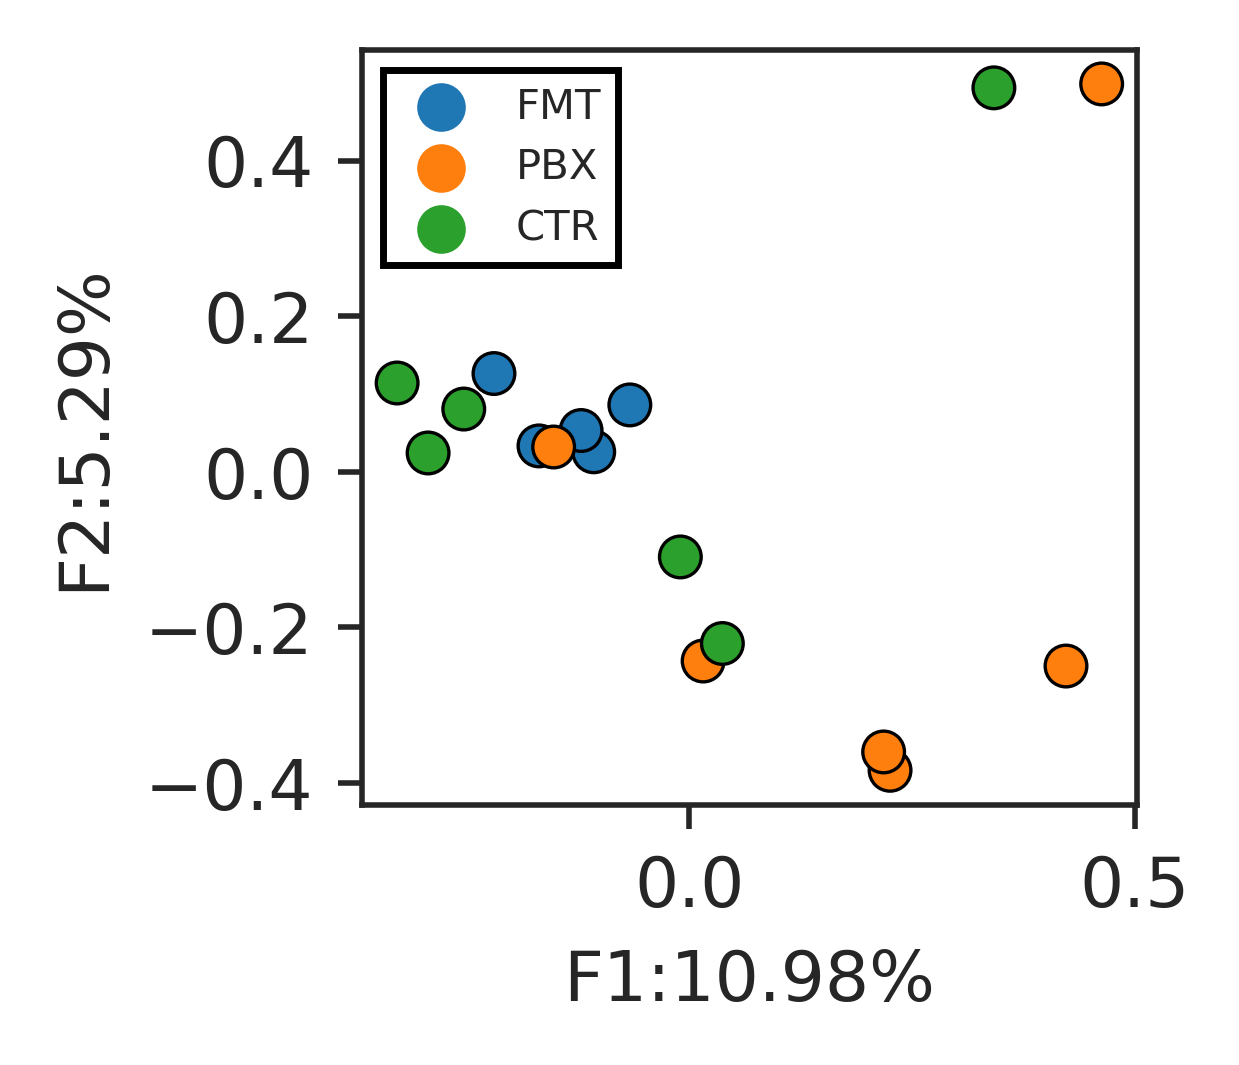

In [6]:
tcam = TCAM(n_components=1.)    # will produce all components

transformed_data = tcam.fit_transform(tensor_data)
rounded_expvar = np.round(100*tcam.explained_variance_ratio_,2) # store explained variance ratios

# cast the results data into a pandas dataframe, using the first mode identifiers (subjects)
# as indices (row names)
df_tca = pd.DataFrame(transformed_data).rename(index = mode1_reverse_map)
df_tca.columns = [f'F{i}:{val}%' for i,val in enumerate(rounded_expvar, start = 1)]



# append metadata to the factors dataframe
df_plot = meta.merge(df_tca, left_on = 'Participant', right_index=True)





f1, f2 = df_tca.columns[:2].tolist() # get the column names for the first 2 factors
fig, ax = plt.subplots(figsize = [2,2], dpi = 500)
sns.scatterplot(data = df_plot, x = f1, y = f2 , hue='Group', ax = ax, edgecolor = 'k')
ax.legend(fontsize = 6, fancybox = False, framealpha = 1, edgecolor = 'k' )
plt.show()